Populating the interactive namespace from numpy and matplotlib
[[ 0.02      -0.64633   -1.8496    ... -0.23994   -0.29438   -0.0085067]
 [ 0.04      -0.91307   -0.68508   ... -0.35143    0.40314   -0.6916   ]
 [ 0.06      -0.4145    -0.21597   ...  0.34918   -0.79937   -0.94602  ]
 ...
 [ 7.96      -1.4546    -2.6332    ...  0.44525    0.043155  -0.48099  ]
 [ 7.98      -2.2039    -1.321     ... -0.7299    -1.1621    -0.77962  ]
 [ 8.        -1.0315    -0.36607   ... -0.050252  -0.80202   -1.1504   ]]
n_cols:  17


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


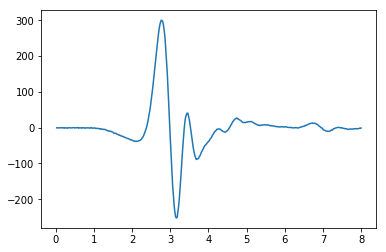

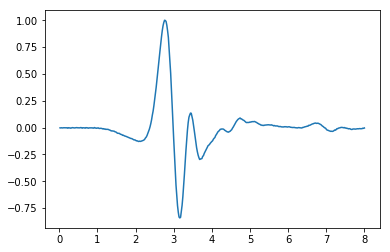

n_t:  400


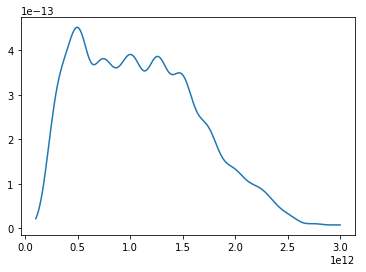

In [27]:
%pylab inline
from scipy import constants
import numpy as np
from scipy.interpolate import CubicSpline
    
from numpy import genfromtxt
my_data = genfromtxt('../out/EO_sampling_data.csv')

print(my_data)

n_cols = my_data.shape[1]
print("n_cols: ", n_cols)

for i in range(1, 2):
    plot(my_data[:,0], my_data[:,i])
show()

t_samples_ps = my_data[:,0]
E_t_samples = my_data[:, 1]
E_t_samples /= np.max(np.abs(E_t_samples))

padPoints = False
if padPoints:
    dt_ps = t_samples_ps[1] - t_samples_ps[0]
    t_extra = np.array([t_samples_ps[-1] + i*dt_ps for i in range(1, 1000)])
    E_extra = np.zeros(len(t_extra))

    t_samples_ps = np.concatenate((t_samples_ps, t_extra))
    E_t_samples = np.concatenate((E_t_samples, E_extra))

n_t, t_ps, E_t = [None]*3
intpolate = False
if intpolate:
    n_t = 2000
    cs = CubicSpline(t_samples_ps, E_t_samples)
    t_ps = np.linspace(t_samples_ps[0], t_samples_ps[-1], n_t)
    E_t = cs(t_ps)
else:
    t_ps = t_samples_ps
    E_t = E_t_samples
    n_t = len(t_ps)
    
plot(t_ps, E_t)
show()
    
print("n_t: ", n_t)
t = t_ps * 1.0e-12 
n_f = 200
f0 = 0.1*constants.tera
f1 = 3.0*constants.tera
f = np.linspace(f0, f1, n_f)
E_f = np.zeros(n_f, dtype=complex)


for i in range(n_f):
    w_i = 2.0*np.pi*f[i]
    for j in range(n_t):
        E_f[i] += E_t[j]*np.exp(-1j*w_i*t[j]) 
E_f *= (t[1] - t[0])

plot(f, np.abs(E_f))
show()


/home/nima/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


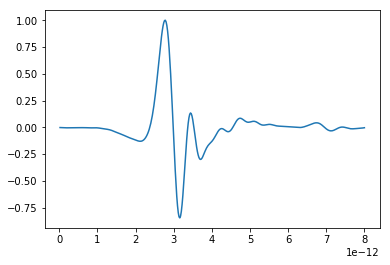

In [28]:

t = my_data[:,0]*constants.pico
n_t = len(t)
E_1 = np.zeros(n_t, dtype=complex)

for i in range(n_t):
    for j in range(n_f):
        w_j = 2.0*np.pi*f[j]
        E_1[i] += 2.0*np.real(E_f[j] * np.exp(1j*w_j*t[i]))
E_1 *= (f[1] - f[0])

plot(t, E_1)
